<a href="https://colab.research.google.com/github/Adrielle123abreu/FinQuant/blob/main/Case_Avan%C3%A7ado_Quant_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando bibliotecas
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import numpy as np
import plotly.express as px

# Questão 1


In [2]:
# Criando uma função com parâmetros para datas, e nomes das ações.

def extrai(tickers:list,inicio,fim):

    dfs = []

# Criando um loop, para que seja repetido o processo de extração e inserção das ações dentro de um df
    for ticker in tickers:
        precos = yf.download(ticker, start = inicio, end = fim)
        precos = pd.DataFrame({ticker:precos["Adj Close"]})
        precos.index = pd.to_datetime(precos.index, format = '%Y-%m-%d')
        dfs.append(precos)

    return pd.concat(dfs,axis =1)

tickers = ["VALE3.SA","PETR4.SA","MGLU3.SA","BBDC4.SA","ITUB4.SA"]
inicio = "2018-01-01"
fim = "2022-12-31"

precos = extrai(tickers, inicio, fim)

print(f' Tabela com apenas informações do fechamento ajustado')
display(precos)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 Tabela com apenas informações do fechamento ajustado


,VALE3.SA,PETR4.SA,MGLU3.SA,BBDC4.SA,ITUB4.SA
Date,,,,,
2018-01-02,25.256784,5.312315,22.859306,13.743339,22.592638
2018-01-03,25.105442,5.360464,22.571043,13.806521,22.747105
2018-01-04,25.208357,5.370093,23.112980,14.033045,23.220795
2018-01-05,25.601858,5.402191,22.657522,14.112530,23.287720
2018-01-08,26.170923,5.466390,22.660406,14.108565,23.210503
...,...,...,...,...,...
2022-12-23,74.970680,17.090260,25.066666,12.979100,22.653627
2022-12-26,75.656815,16.967796,24.879601,12.670481,22.203978
2022-12-27,77.463341,17.083456,23.570148,12.610470,22.078070


# Questão 2



<AxesSubplot:title={'center':'Ações'}, xlabel='Date'>

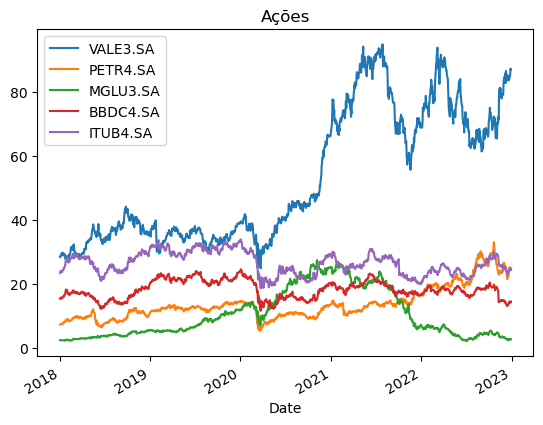

In [ ]:
# Criando um gráfico com todas as variações de preços das ações ao longo dos anos, utilizando a biblioteca matplotlib.
precos.plot(title = 'Ações')

# Questão 3

<AxesSubplot:xlabel='Date'>

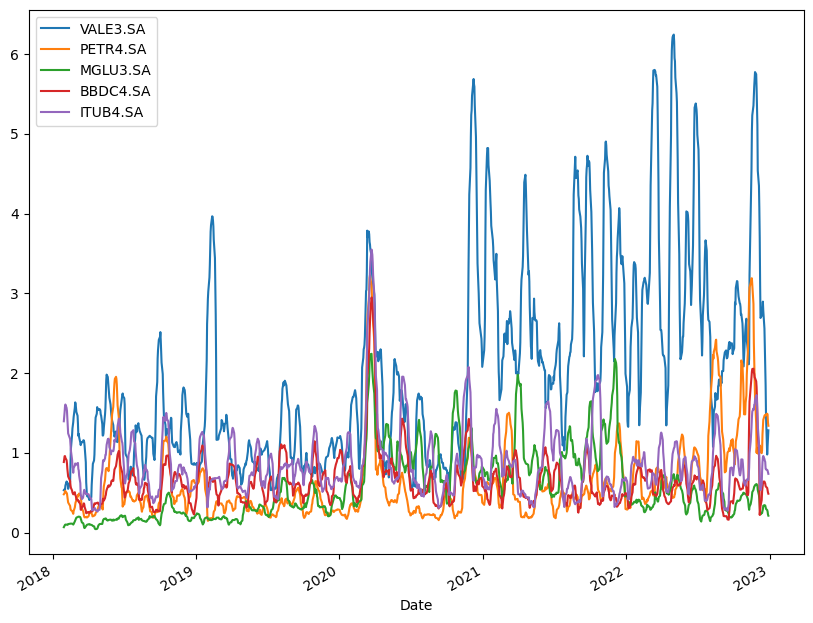

In [ ]:
# Utilizando funções rolling e std, para calcular o desvio padrão móvel de 20 dias.

precos_desvio = precos.rolling(20).std().plot(figsize = (10,8))
display(precos_desvio)

#Interpretação:

#Sendo o desvio padrão um indicador de volatilidade, um desvio padrão móvel de 20 dias,
#mostrará o comportamento recente da ação em relação à variações dos preços.

#Observando o gráfico, percebe-se que ação VAL3 tem ocilações mais extrema de preço,
#indicando ser mais sensível a eventos macros e micros em curtos prazos.

# As restantes também apresentam flutuações, mas com menores picos.

# Questão 4

In [ ]:
# Criando um novo DataFrame apenas com informações da PETR4
Petrobras = precos.copy()
Petrobras = Petrobras[['PETR4.SA']]
Petrobras.columns = ['Adj Close']

In [ ]:
#  Criando uma função para adicionar ao df Petrobras, informações necessárias para resolução do problema.

def bandas_de_bolling(Petrobras, period = 20, std_factor=2):
    Petrobras['std'] = Petrobras['Adj Close'].rolling(period).std()
    Petrobras['mean'] = Petrobras['Adj Close'].rolling(period).mean()
    Petrobras['banda_superior'] = Petrobras['mean'] + Petrobras['std'] * std_factor
    Petrobras['banda_inferior'] = Petrobras['mean'] - Petrobras['std'] * std_factor

bandas_de_bolling(Petrobras)
Petrobras

# Fazendo ajustes no DataFrame

Petrobras = Petrobras.dropna()
Petrobras = Petrobras.drop(['std', 'mean'], axis = 1)
Petrobras = Petrobras.reset_index('Date')

In [ ]:
# Plotando o gráfico interativo

fig = go.Figure()
fig.add_trace(go.Scatter(x=Petrobras['Date'], y=Petrobras['Adj Close'], name='Adj Close', mode ='lines'))
fig.add_trace(go.Scatter(x=Petrobras['Date'], y=Petrobras['banda_superior'], name='banda_superior', mode = 'lines'))
fig.add_trace(go.Scatter(x=Petrobras['Date'], y=Petrobras['banda_inferior'],  name='banda_inferior', mode = 'lines'))

fig.update_layout(xaxis_title='Ano',yaxis_title='Preços',title='bandas de bollinger')

fig.show()

#Interpretação:
#Sendo as bandas de bollinger um indicador de volatilidade para ações, é utilizada para identificar períodos de alta e baixa
#desse indicador nos preços de ações, e pode ser utilizada para prever quando comprar ou vender uma ação.

#Assim, observando as ações da Petrobras, é possível perceber que antes da pandemia
#havia uma tendência de crescimentos do preços, que foi freada durante a pandemia,e
#agora observa-se uma nova tendência de aumentos. Além de ter superado o patamar pré-pandemia.

# Uma forma de decidir vender ou comprar  uma ação utilizando essa ferramenta,
#é a partir dos momentos que o preço de fechamento encontra as bandas superiores ou inferiores.

#Observa-se que quando o preço se encontra com a banda superior, posteriormente as ações começam a cair,
#e inversalmente para as bandas inferiores.

#Assim, o melhor momento para uma eventual venda seria quando os preços estivessem prestes a serem iguais a banda superior.

# Questão 5

In [ ]:
# Utilizando uma função
retorno = precos.pct_change()
retorno = retorno.reset_index('Date')
retorno

,Date,VALE3.SA,PETR4.SA,MGLU3.SA,BBDC4.SA,ITUB4.SA
0,2018-01-02,NaN,NaN,NaN,NaN,NaN
1,2018-01-03,-0.005992,0.009064,-0.012610,0.004597,0.006836
2,2018-01-04,0.004099,0.001796,0.024010,0.016407,0.020824
3,2018-01-05,0.015610,0.005977,-0.019706,0.005664,0.002883
4,2018-01-08,0.022227,0.011884,0.000127,-0.000281,-0.003317
...,...,...,...,...,...,...
1234,2022-12-23,0.006647,0.047103,0.030769,0.017473,0.015726
1235,2022-12-26,0.009152,-0.007166,-0.007463,-0.023778,-0.019849
1236,2022-12-27,0.023878,0.006816,-0.052632,-0.004736,-0.005670
1237,2022-12-28,-0.002242,-0.012346,0.067460,0.030591,0.020367


# Questão 6

In [ ]:
# Criando uma função para plotar todas as variáveis no gráfico

def grafico_ret(retorno, columns ={}):
    fig_ret_todas = go.Figure()
    for colunas in columns:
        fig_ret_todas.add_trace(go.Scatter(x = retorno['Date'],
                                y = (1 + retorno[colunas]).cumprod(),
                                mode = columns[colunas],
                                name = colunas))
        fig_ret_todas.update_layout(xaxis_title='Ano',yaxis_title='Retorno',title='Retorno ações')
    return fig_ret_todas

In [ ]:
columns = {'BBDC4.SA': 'lines',
          'ITUB4.SA': 'lines',
          'VALE3.SA' : 'lines',
           'PETR4.SA': 'lines',
           'MGLU3.SA' :'lines'}
fig_ret_todas = grafico_ret(retorno, columns = columns)
fig_ret_todas.show()

# Optei por mostrar os retornos acumulativos das ações, invés de retornos individuais pois o gráfico desses fica inconclusivo.

# Questão 7

In [ ]:
opacity = 0.7
def grafico(retorno, columns ={}):
    fig_ret = go.Figure()
    for colunas in columns:
        fig_ret.add_trace(go.Scatter(x = retorno['Date'],
                                y = retorno[colunas],
                                mode = columns[colunas],
                                name = colunas,
                                opacity=opacity))
        fig_ret.update_layout(xaxis_title='Ano',yaxis_title='Retorno',title='BBDC4 x ITUB4')
    return fig_ret

In [ ]:
columns = {'BBDC4.SA': 'markers',
          'ITUB4.SA': 'markers'}
fig_ret = grafico(retorno, columns = columns)
fig_ret

#Interpretação:

# O gráfico de dispersão com muitos dados acabam não sendo muito útil,
#mas uma conclusão que teria é que as ações das duas empresas em média andam lado a lado,
#por terem uma concentração bem próxima.

# E durante a pandemia, observa-se uns valores mais discrepantes, revelando a incerteza e dificuldade no mercado.

# Questão 8

<AxesSubplot:>

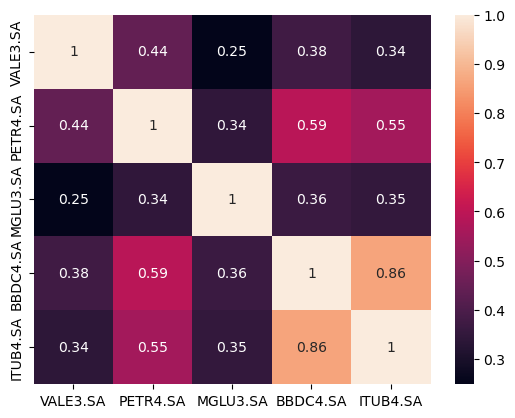

In [ ]:
# Utilizando uma funcão do python para obter a matriz de correlação
ret_corr = retorno.corr(method='pearson')

# Plotando esses resultando num mapa de calor

sns.heatmap(retorno.corr(), annot = True)

#Interpretação:

# As ações do Bradesco e Itaú são as mais correlacionadas,
#indicando que se uma está crescendo, a outra também pode estar,e
#por estarem no mesmo setor podem ser afetadas da mesma forma se tratando de assuntos macros,
# sendo uma das razões para tal correlação.

#Por outro lado, as ações da Magalu e Vale, são as menos correlaciodas,
#indicando que se uma está em queda,a outra pode estar crescendo.

# Portanto a matriz vai mostrar a relação entre ações das empresas, e apontar os efeitos de tal grau.


# Questão 9

In [ ]:
# Criando um novo dataframe, e criando uma nova colunas para meses,
#e condição para o ano de 2021

Retorno_2021 = retorno.copy()
Retorno_2021 = Retorno_2021.dropna()
Retorno_2021['mes'] = Retorno_2021['Date'].dt.month
Retorno_2021['Date'] = Retorno_2021['Date'].dt.year
Retorno_2021 = Retorno_2021.query('Date == 2021')
Retorno_2021



,Date,VALE3.SA,PETR4.SA,MGLU3.SA,BBDC4.SA,ITUB4.SA,mes
742,2021,0.045855,0.020113,0.010020,-0.026160,-0.022616,1
743,2021,0.016838,0.039087,-0.017460,-0.006097,-0.006472,1
744,2021,0.032796,0.001997,-0.052504,0.033143,0.029316,1
745,2021,0.065278,0.029900,-0.012788,0.026548,0.038924,1
746,2021,-0.003127,0.003871,0.029361,-0.008621,-0.000305,1
...,...,...,...,...,...,...,...
984,2021,-0.009635,0.006037,0.006494,0.003128,0.005181,12
985,2021,-0.002527,0.014825,0.093548,0.011435,0.010309,12
986,2021,-0.024066,0.001043,0.007375,-0.003597,-0.003711,12
987,2021,0.002596,-0.008339,-0.010249,-0.004641,-0.008380,12


In [ ]:
# Calculando retorno múltiplos do período
Retorno_2021_mult = Retorno_2021.copy()
Retorno_2021_mult = Retorno_2021_mult.drop(['Date', 'mes'], axis = 1)
Retorno_2021_mult = pd.DataFrame((Retorno_2021_mult + 1).prod() - 1)*100
Retorno_2021_mult.columns = ['Retorno múltiplos']
Retorno_2021_mult

#Interpretação:

#As ações das empresas Vale e Petrobras foram as unicas que tiveram,
#retorno positivo no ano.

,Retorno múltiplos
VALE3.SA,4.872767
PETR4.SA,23.510248
MGLU3.SA,-71.041141
BBDC4.SA,-18.582719
ITUB4.SA,-31.404927


Text(0, 0.5, 'Retornos médios mensais')

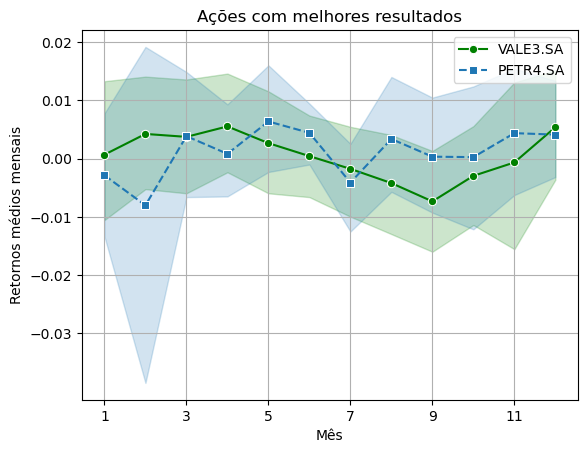

In [ ]:
# Criando um gráfico para analisar o desempenho da Vale e Petrobras

plt.grid(True)
ay = sns.lineplot(x = 'mes', y = 'VALE3.SA', data = Retorno_2021,marker = 'o' ,color = 'green', label = 'VALE3.SA')
sns.lineplot(x = 'mes', y = 'PETR4.SA', data = Retorno_2021,marker = 's'  ,linestyle='dashed', label = 'PETR4.SA')
plt.yticks(np.arange(-0.03,0.03,0.01))
plt.xticks(np.arange(1,13,2))
ay.set(title = "Ações com melhores resultados")
plt.xlabel('Mês')
plt.ylabel('Retornos médios mensais')

#Interpretação:

#Analisando a média de retorno mensal, na maioria dos meses de 2021, as ações terminaram o mês
# entregando um resultado positivo, com retornos acima de 0%.

Text(0, 0.5, 'Retornos médios mensais')

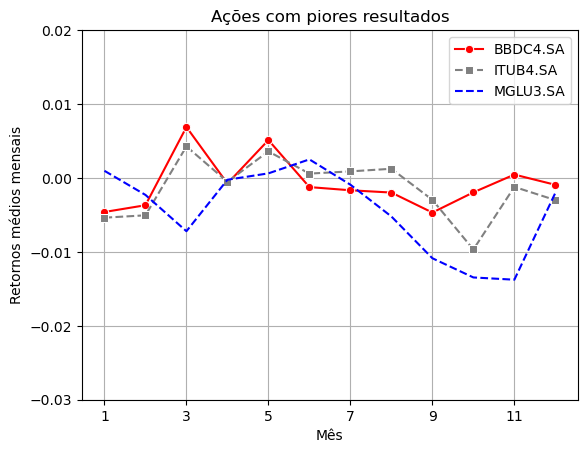

In [ ]:
plt.grid(True)
ax = sns.lineplot(x = 'mes', y = 'BBDC4.SA', data = Retorno_2021,marker = 'o' ,color = 'red', label = 'BBDC4.SA', ci = None)
sns.lineplot(x = 'mes', y = 'ITUB4.SA', data = Retorno_2021,marker = 's'  ,color = 'gray',linestyle='dashed', label = 'ITUB4.SA',ci = None)
sns.lineplot(x = 'mes', y = 'MGLU3.SA', data = Retorno_2021,marker = ''  ,color = 'blue',linestyle='dashed', label = 'MGLU3.SA', ci = None)
plt.yticks(np.arange(-0.03,0.03,0.01))
plt.xticks(np.arange(1,13,2))
ax.set(title = "Ações com piores resultados")
plt.xlabel('Mês')
plt.ylabel('Retornos médios mensais')

# Por outro lado, nota-se que as ações principalmente MGLU3, passou a maior parte do ano, entregando retorno negativos,
# o que afundou o resultado anual.

# Em relação às outras, essas andaram de lado, mas o Bradesco sobretudo, apresentou uma consistência maior,
# não tendo quedas significativas, e se mantendo perto do 0%.


# Questão 10

In [ ]:
# Criando um novo dataframe, e criando uma nova colunas para meses,
#e condição para o ano de 2020

Retorno_2020 = retorno.copy()
Retorno_2020 = Retorno_2020.dropna()
Retorno_2020['mes'] = Retorno_2020['Date'].dt.month
Retorno_2020['Date'] = Retorno_2020['Date'].dt.year
Retorno_2020 = Retorno_2020.query('Date == 2020')


In [ ]:
riscos_2020 = Retorno_2020[['VALE3.SA', 'PETR4.SA','MGLU3.SA','BBDC4.SA','ITUB4.SA']].std()*252**0.5
riscos_2020 = pd.DataFrame(riscos_2020)
riscos_2020.columns = ['Risco anual']
riscos_2020

#Interpretação:

,Risco anual
VALE3.SA,0.553530
PETR4.SA,0.684528
MGLU3.SA,0.700809
BBDC4.SA,0.572246
ITUB4.SA,0.482082


In [ ]:
Retorno_2020_mult = Retorno_2020.copy()
Retorno_2020_mult = Retorno_2020_mult.drop(['Date', 'mes'], axis = 1)
((Retorno_2020_mult + 1).prod() - 1)*100
#(Retorno_2020_mult + 1).cumprod()

VALE3.SA     70.929877
PETR4.SA     -6.089787
MGLU3.SA    114.495588
BBDC4.SA    -15.215634
ITUB4.SA    -12.546902
dtype: float64

# Questão 11

In [ ]:
# Utilizando formúlas do python para encontrar os retornos logaritmicos
#dos preços das ações da Vale.

Retorno_log = precos[['VALE3.SA']].copy()
Retorno_log = np.log(Retorno_log).diff().dropna()
Retorno_log

,VALE3.SA
Date,
2018-01-03,-0.006010
2018-01-04,0.004091
2018-01-05,0.015490
2018-01-08,0.021984
2018-01-09,-0.003708
...,...
2022-12-23,0.006625
2022-12-26,0.009110
2022-12-27,0.023597


In [ ]:
# Plotando o histograma

histograma = go.Figure(data=[go.Histogram(x = Retorno_log['VALE3.SA'])])
histograma.update_layout(title = 'Histograma', xaxis_title = 'Retorno', yaxis_title = 'Frequência' )
histograma.show()

# O gráfico sugere que há uma distribuição normal, sendo simétrica em torno da média.
# No caso da Vale, o maior número de repetição de ocorrência se deu de retornos negativos.

# Questão 12

## Teste de hipótese

**H<sup>null</sup>**
>**A distribuição da ação é normal**

**H<sup>alt</sup>**
>**A distribuição da ação não é normal**

In [ ]:
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import kurtosis
from scipy.stats import skew

In [ ]:
alpha = 0.05
stats,p_valor = shapiro(Retorno_log)
if p_valor <= alpha:
    print(f' O p-valor é igual a {p_valor}. Portanto a hipótese nula é rejeitada')
else:
    print(f' O p-valor é igual a {p_valor}.Portanto a hipótese alternativa é rejeitada')

from scipy.stats import kurtosis
espessura = kurtosis(Retorno_log) #Indica um maior risco, e outliers de retorno positivo e negativo são mais comuns
print("Espessura:", espessura )

from scipy.stats import skew
assimetria = skew(Retorno_log) # Uma maior distribuição do lado esquerdo de retornos negativos
print("Assimetria:", assimetria)

#Interpretação:

# Um p-valor menor que o nível de significância, indica que a hipótese nula deve ser rejeitada,
# ou seja, a distribuição das ações da Vale não é normal, e portanto suas ações não se comporta de acordo com a média,
# e outliers podem ser mais prováveis.

#Outras formas de corroborar para tal conclusão, é os valores diferente de 0 para assimentria, e espessura maior que 3.


 O p-valor é igual a 1.4573281981291102e-28. Portanto a hipótese nula é rejeitada
Espessura: [16.96478999]
Assimetria: [-0.76403267]


# Questão 13

#### Drawdown --> medida de risco, obtida a partir da perda comprando uma ação no máximo e vendendo no mímino.

In [ ]:
# Calculando os retornos das ações
ret_acoes = precos.pct_change().dropna()

# Simulação das variações dos preços das ações de acordo com os retornos
wealth_index1 = precos * (ret_acoes + 1 ).cumprod().dropna()

#
picos1 = wealth_index1.cummax()

#
drawdown1 = ((wealth_index1 - picos1) / picos1).dropna()
drawdown1

,VALE3.SA,PETR4.SA,MGLU3.SA,BBDC4.SA,ITUB4.SA
Date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,28.115333,7.425684,2.330995,15.451674,23.679745
2018-01-04,28.346311,7.452379,2.444275,15.962878,24.676245
2018-01-05,29.238203,7.541735,2.348892,16.144221,24.818722
2018-01-08,30.552432,7.722052,2.349488,16.135136,24.654368
...,...,...,...,...,...
2022-12-23,250.720878,86.524719,3.004037,13.679491,26.403951
2022-12-26,255.331035,85.289156,2.959368,13.036680,25.366161
2022-12-27,267.670165,86.455842,2.656053,12.913489,25.079304


In [ ]:
def maximux_drawdown(drawdown1, columns1 = {}):
    x = []
    for cols in columns1:
        max_drawdown2 = drawdown1[cols].min()
        perda1 = max_drawdown2 * -100
        x.append(pd.Series(perda1, name = cols))


    return pd.concat(x,axis = 1)

columns1 = ['VALE3.SA','PETR4.SA', 'MGLU3.SA','BBDC4.SA','ITUB4.SA']
drawdowns = maximux_drawdown(drawdown1, columns1 = columns1)
drawdowns

,VALE3.SA,PETR4.SA,MGLU3.SA,BBDC4.SA,ITUB4.SA
0,68.330268,86.572208,99.395762,77.667596,69.984933


In [ ]:
# Interpretação:

#Dentre todas as ações, a que teve um maior drawdown de quase 100% foi a MGLU3.SA.
# Significando que praticamente todo investimento e retornos do melhor ponto histórico foram perdidos.
# Olhando o gráfico abaixo do comportamento das ações da Magalu, percebe-se a queda foi contínua,sem índicios de crescimento.
# Umas das possíveis causas foi a desaleração da economia no segundo ano da pandemia.

# As da Vale, e Itau foram as que menos perderam valor de investimento, com porcentagens bem próximas.
# Indicando que quando há quedas, logo depois existe uma possibilidade de melhora, e portanto crecimento.

<AxesSubplot:xlabel='Date'>

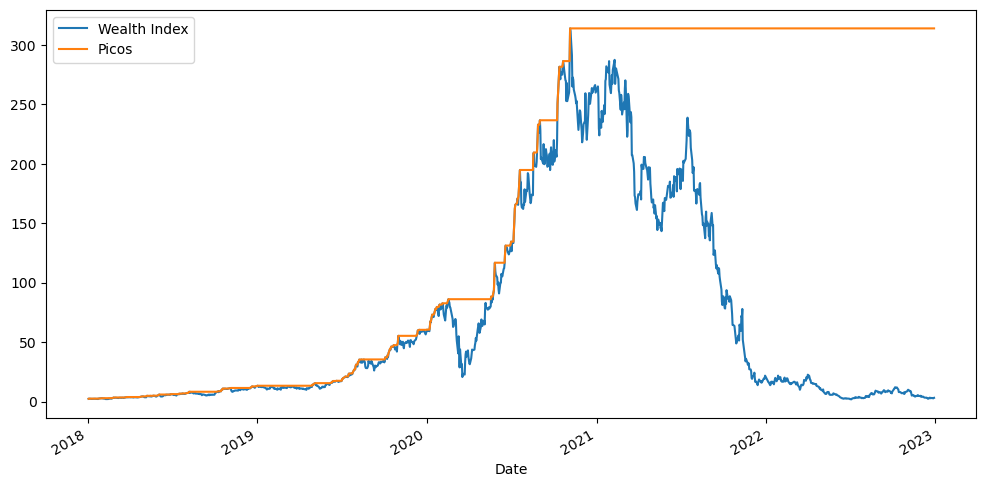

In [ ]:
# Gráfico do drawdown da ações MGLU3.SA
precos_vale = precos[['MGLU3.SA']]
ret_vale = precos_vale.pct_change().dropna()
wealth_index = precos_vale * (ret_vale + 1 ).cumprod().dropna()
picos = wealth_index.cummax()
drawdown = (wealth_index - picos) / picos

ret_vale['Wealth Index'] = wealth_index
ret_vale['Picos'] = picos
ret_vale['Drawdown'] = drawdown

ret_vale[['Wealth Index', 'Picos']].plot(figsize = (12,6))

# Questão 14

In [ ]:
import random

In [ ]:
# Utilizando a biblioteca random para retornar 5 valores entre 0 e 1,
#e por fim normalizando para que a soma seja igual a 1
pesos = np.random.random(5)
pesos = pesos/pesos.sum()
print(f'Os pesos atribuídos foram: {pesos}')

pesos.sum()

Os pesos atribuídos foram: [0.30940949 0.19134507 0.12715653 0.28158007 0.09050884]


1.0

In [ ]:
retorno_portfolio = retorno.copy()
retorno_portfolio = retorno_portfolio.set_index('Date').dropna()

retorno_portfolio["Retorno do Portfolio"] = retorno_portfolio.mul(pesos, axis = 1).sum(axis = 1)
retorno_portfolio

,VALE3.SA,PETR4.SA,MGLU3.SA,BBDC4.SA,ITUB4.SA,Retorno do Portfolio
Date,,,,,,
2018-01-03,-0.005992,0.009064,-0.012610,0.004597,0.006836,0.000190
2018-01-04,0.004099,0.001796,0.024010,0.016407,0.020824,0.011170
2018-01-05,0.015610,0.005977,-0.019706,0.005664,0.002883,0.005324
2018-01-08,0.022227,0.011884,0.000127,-0.000281,-0.003317,0.008788
2018-01-09,-0.003701,0.000000,-0.024043,-0.009296,-0.010870,-0.007804
...,...,...,...,...,...,...
2022-12-23,0.006647,0.047103,0.030769,0.017473,0.015726,0.021326
2022-12-26,0.009152,-0.007166,-0.007463,-0.023778,-0.019849,-0.007980
2022-12-27,0.023878,0.006816,-0.052632,-0.004736,-0.005670,0.000153


<AxesSubplot:xlabel='Date'>

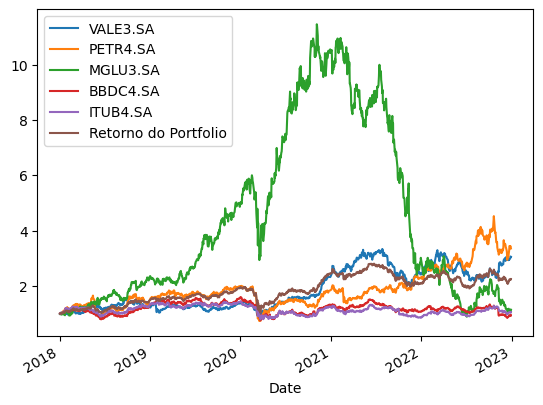

In [ ]:
# Criação de um gráfico comparativo entre as ações e o portfólio a título de curiosidade

def ret_acumulados(retorno_portfolio, columns ={}):
    d = []
    for colunas in columns:
        ret_acumulados = (1 + retorno_portfolio[colunas]).cumprod()
        d.append(ret_acumulados)

    return pd.concat(d,axis =1)

columns = ['VALE3.SA','PETR4.SA', 'MGLU3.SA','BBDC4.SA','ITUB4.SA','Retorno do Portfolio']
retornos_acumulados = ret_acumulados(retorno_portfolio, columns = columns)

retornos_acumulados.plot()

# Questão 15



In [ ]:
desvio_portfolio = retorno.copy().dropna()
cov_mat = desvio_portfolio.cov()
cov_mat

,VALE3.SA,PETR4.SA,MGLU3.SA,BBDC4.SA,ITUB4.SA
VALE3.SA,0.000670,0.000349,0.000251,0.000231,0.000188
PETR4.SA,0.000349,0.000937,0.000411,0.000428,0.000361
MGLU3.SA,0.000251,0.000411,0.001515,0.000336,0.000290
BBDC4.SA,0.000231,0.000428,0.000336,0.000564,0.000438
ITUB4.SA,0.000188,0.000361,0.000290,0.000438,0.000457


In [ ]:
des_esperado_port = np.sqrt(np.dot(pesos.T,np.dot(cov_mat,pesos))).round(5)
print(f'O desvio padrão esperado é igual {des_esperado_port}')

O desvio padrão esperado é igual 0.02037


In [ ]:
ret_esperado = retorno_portfolio["Retorno do Portfolio"].mean()
ret_esperado = round(ret_esperado, 5)
print(f'O retorno diário esperado é igual a {ret_esperado}')

O retorno diário esperado é igual a 0.00087


In [ ]:
# retorno esperado = soma dos produtos entre os pesos e os retornos de cada ação

# Questão 16

In [ ]:
pesos2 = np.random.random(5)
pesos2 = pesos2/pesos2.sum()
print(f'Os pesos atribuídos foram : {pesos2}')

pesos2.sum()

Os pesos atribuídos foram : [0.0975902  0.15964432 0.33308456 0.33013363 0.07954729]


1.0000000000000002

In [ ]:
retorno_portfolio1 = retorno.copy()
retorno_portfolio1 = retorno_portfolio1.set_index('Date').dropna()

retorno_portfolio1["Retorno de Portfolio2"] = retorno_portfolio1.mul(pesos2, axis = 1).sum(axis = 1)
retorno_portfolio1

,VALE3.SA,PETR4.SA,MGLU3.SA,BBDC4.SA,ITUB4.SA,Retorno de Portfolio2
Date,,,,,,
2018-01-03,-0.005992,0.009064,-0.012610,0.004597,0.006836,-0.001277
2018-01-04,0.004099,0.001796,0.024010,0.016407,0.020824,0.015757
2018-01-05,0.015610,0.005977,-0.019706,0.005664,0.002883,-0.001987
2018-01-08,0.022227,0.011884,0.000127,-0.000281,-0.003317,0.003752
2018-01-09,-0.003701,0.000000,-0.024043,-0.009296,-0.010870,-0.012303
...,...,...,...,...,...,...
2022-12-23,0.006647,0.047103,0.030769,0.017473,0.015726,0.025437
2022-12-26,0.009152,-0.007166,-0.007463,-0.023778,-0.019849,-0.012165
2022-12-27,0.023878,0.006816,-0.052632,-0.004736,-0.005670,-0.016127


In [ ]:
des_esperado_port2 = np.sqrt(np.dot(pesos2.T,np.dot(cov_mat,pesos2))).round(5)
print(f'O desvio padrão esperado é igual {des_esperado_port2}')

O desvio padrão esperado é igual 0.02276


In [ ]:
ret_esperado2 = retorno_portfolio1["Retorno de Portfolio2"].mean()
ret_esperado2 = round(ret_esperado2, 5)
print(f'O retorno diário esperado é igual a {ret_esperado2}')

O retorno diário esperado é igual a 0.00074


In [ ]:
print(f'O retorno esperado do primeiro portfólio é igual a {ret_esperado}, e seu risco esperado é igual a {des_esperado_port}')

print(f'O retorno esperado do segundo portfólio é igual a {ret_esperado2}, e seu risco esperado é igual a {des_esperado_port2}')


O retorno esperado do primeiro portfólio é igual a 0.00087, e seu risco esperado é igual a 0.02037
O retorno esperado do segundo portfólio é igual a 0.00074, e seu risco esperado é igual a 0.02276


In [ ]:
if des_esperado_port2 > des_esperado_port and ret_esperado2 > ret_esperado:
    print(f'O portfólio 2 apresenta mais risco de {des_esperado_port2}, mas tem um maior potencial de retorno')
elif des_esperado_port2 > des_esperado_port and ret_esperado2 < ret_esperado:
    print(f'O portfólio 1 apresenta menos  risco de {des_esperado_port}, com um potencial de retorno menor')

O portfólio 1 apresenta mais risco 0.02037, mas tem um maior potencial de retorno
